# Pymaceuticals Inc.
---

### Analysis
In this analysis, we observe that the Capomulin and Ramicane regimens yielded the smallest average tumor sizes among the treatment regimens. Additionally, these regimens exhibited lower variance, standard deviation, and standard error compared to the others, indicating that the data within these groups is more tightly clustered. This suggests that the variance is likely a result of the properties and effectiveness of these drugs, rather than being influenced by outliers.

Notably, these two drugs also had the largest number of mice tested among the regimens, making their tight data groups even more impressive.

The distribution of mice across sexes was fairly balanced, with approximately equal numbers of males and females. Therefore, it's unlikely that the overall dataset is skewed due to an under or over-representation of one sex in the testing.

Among the promising drugs, including Capomulin, Ramicane, Infubinol, and Ceftamin, Capomulin and Ramicane stood out as the most impressive. Their box plots further illustrated their superiority, showcasing lower average tumor sizes and a lack of outliers that could distort the results.

Moreover, there exists a strong correlation between the average tumor size and the weight of mice in the Capomulin regimen. This suggests that incorporating weight loss, diet, and exercise alongside the treatment may lead to more favorable outcomes. However, further testing is recommended to validate this hypothesis.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [3]:
# Study data files
study_results_path = "data/Study_results.csv"
study_results_df = pd.read_csv(study_results_path)
study_results_df.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
merged_results_df=pd.merge(mouse_metadata_df,study_results_df, on = ["Mouse ID"], how = "inner")
# Display the data table for preview
merged_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking for missing data
merged_results_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Checking the number of mice.
mouse_ids = merged_results_df["Mouse ID"].unique()
mouse_num = len(mouse_ids)
print (f'There are {mouse_num} mice.')


There are 249 mice.


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_etries = merged_results_df[merged_results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_etries 
# Optional: Get all the data for the duplicate mouse ID. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cln_merged_results_df=merged_results_df.loc[merged_results_df["Mouse ID"] != "g989"]
# Display the dataframe
cln_merged_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_num = len(mouse_ids)
print (f'There are {mouse_num} mice.')

There are 249 mice.


## Summary Statistics

In [10]:
# Create dataframe of tumor volumes grouped by drug regimen for analysis
groupby_regimen_tumor_volue_df = cln_merged_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]


In [11]:
# Generate dataframe of mean tumor volumes by regimen
mean_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.mean())
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
mean_tumor_volume_df.head(1)

,Mean Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741


In [12]:
# Generate dataframe of median tumor volumes by regimen
median_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.median())
median_tumor_volume_df = median_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
median_tumor_volume_df.head(1)

,Median Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809


In [13]:
# Generate dataframe of standard deviations of tumor volumes by regimen
var_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.var(ddof=0))
var_tumor_volume_df = var_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Variance of Tumor Volume (mm3)"})
var_tumor_volume_df.head(1)

,Variance of Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.839296


In [14]:
# Generate dataframe of standard deviations of tumor volumes by regimen
std_dev_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.std(ddof=0))
std_dev_tumor_volume_df = std_dev_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation of Tumor Volume (mm3)"})
std_dev_tumor_volume_df.head(1)

,Standard Deviation of Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.983904


In [15]:
# Generate dataframe of standard error of tumor volumes by regimen
sem_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.sem())
sem_tumor_volume_df = sem_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Standard Error of Tumor Volume (mm3)"})
sem_tumor_volume_df.head(1)

,Standard Error of Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346


In [16]:
# Assemble the resulting dataframes into a single summary DataFrame
regimen_tumor_volue_summary_df = mean_tumor_volume_df
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,median_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,var_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,std_dev_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,sem_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar and Pie Charts

In [17]:
# Create dataframe to chart
bar_chart_data = cln_merged_results_df.groupby(["Drug Regimen"])["Mouse ID"].count()
bar_chart_df = pd.DataFrame(bar_chart_data)
bar_chart_df = bar_chart_df.rename(columns={"Mouse ID":"Rows of Data"})
bar_chart_df.head(1)

,Rows of Data
Drug Regimen,
Capomulin,230


<Axes: title={'center': 'Rows of Data Per Regimen'}, xlabel='Drug Regimen', ylabel='Rows of Data'>

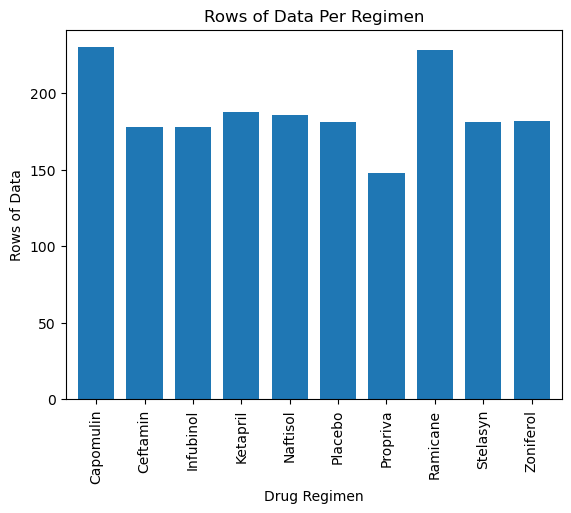

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar1_chart = bar_chart_df.plot (kind="bar", title="Rows of Data Per Regimen", legend=False, width=.75)
bar1_chart.set_ylabel("Rows of Data")
bar1_chart

<function matplotlib.pyplot.show(close=None, block=None)>

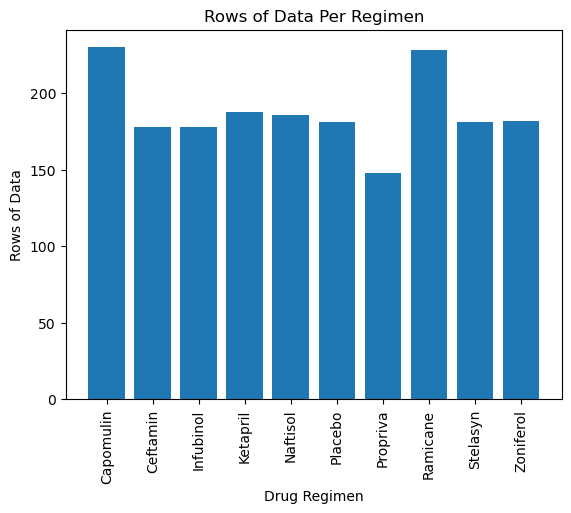

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2_chart = plt.bar(bar_chart_df.index,bar_chart_df["Rows of Data"])
plt.xticks(rotation=90)
plt.xlabel ("Drug Regimen")
plt.ylabel ("Rows of Data")
plt.title ("Rows of Data Per Regimen")
plt.show

In [20]:
# Create dataframe to chart
pie_chart_data = cln_merged_results_df.groupby(["Sex"])["Mouse ID"].count()
pie_chart_df = pd.DataFrame(pie_chart_data)
pie_chart_df = pie_chart_df.rename(columns={"Mouse ID":"Total Mice"})
pie_chart_df

,Total Mice
Sex,
Female,922
Male,958


<Axes: title={'center': 'Mouse Sex Distribution'}>

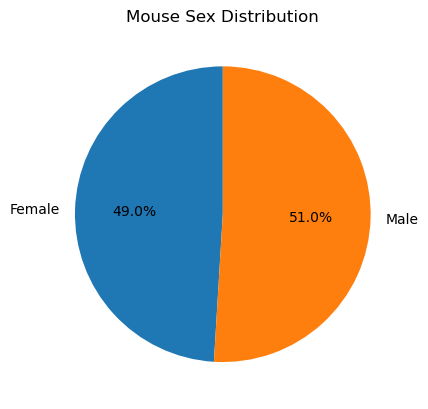

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie1_chart = pie_chart_df["Total Mice"].plot (kind="pie", title="Mouse Sex Distribution", startangle=90, autopct='%1.1f%%')
pie1_chart.set_ylabel("")
pie1_chart

<function matplotlib.pyplot.show(close=None, block=None)>

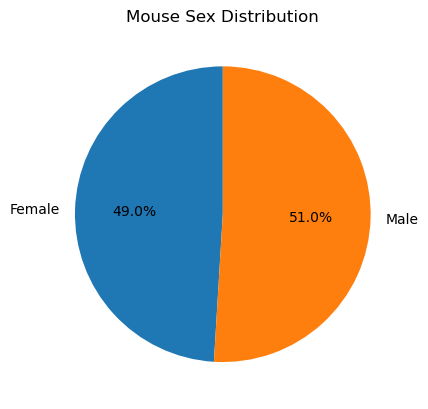

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2_chart = plt.pie(pie_chart_df["Total Mice"], labels=pie_chart_df.index, startangle=90, autopct='%1.1f%%')
plt.title ("Mouse Sex Distribution")

plt.show

## Quartiles, Outliers and Boxplots

In [23]:
grouped_final_tumor_volume = cln_merged_results_df.groupby(["Mouse ID"])["Timepoint"].max()
grouped_final_tumor_volume_df = pd.DataFrame(grouped_final_tumor_volume)
grouped_final_tumor_volume_df = grouped_final_tumor_volume_df.reset_index()
grouped_final_tumor_volume_df.head(1)

,Mouse ID,Timepoint
0,a203,45


In [24]:
# Merge this grouped DataFrame with the original cleaned DataFrame
new_cln_merged_results_df = pd.merge(cln_merged_results_df,grouped_final_tumor_volume_df, on = ["Mouse ID","Timepoint"], how = "right")
new_cln_merged_results_df = new_cln_merged_results_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
new_cln_merged_results_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

In [26]:
# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.
for treatment in promising_treatments:
    treatment_vol_data = new_cln_merged_results_df.loc[(new_cln_merged_results_df["Drug Regimen"] == treatment),"Final Tumor Volume (mm3)"]
    # Append the resulting final tumor volumes for each drug to the empty list.
    tumor_vol_data.append(treatment_vol_data)

    # Calculate quartiles and find outliers
    quartiles = treatment_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} final tumor volume is: {lowerq}")
    print(f"The upper quartile of {treatment} final tumor volume is: {upperq}")
    print(f"The interquartile range of {treatment} final tumor volume is: {iqr}")
    print(f"The the median of {treatment} final tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")

    outlier_tumor_volumes = treatment_vol_data.loc[(treatment_vol_data < lower_bound) | (treatment_vol_data > upper_bound)]
    print(f"Potential outliers for {treatment} (if any): {outlier_tumor_volumes}")
    print("")
    print("---------------------------------------------------------")
    print("")

The lower quartile of Capomulin final tumor volume is: 32.37735684
The upper quartile of Capomulin final tumor volume is: 40.1592203
The interquartile range of Capomulin final tumor volume is: 7.781863460000004
The the median of Capomulin final tumor volume is: 38.1251644 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Potential outliers for Capomulin (if any): Series([], Name: Final Tumor Volume (mm3), dtype: float64)

---------------------------------------------------------

The lower quartile of Ramicane final tumor volume is: 31.56046955
The upper quartile of Ramicane final tumor volume is: 40.65900627
The interquartile range of Ramicane final tumor volume is: 9.098536719999998
The the median of Ramicane final tumor volume is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
Potential outliers for Ramicane (if any): Series(

In [27]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Text(0, 0.5, 'Final Tumor Volume (mm3)')

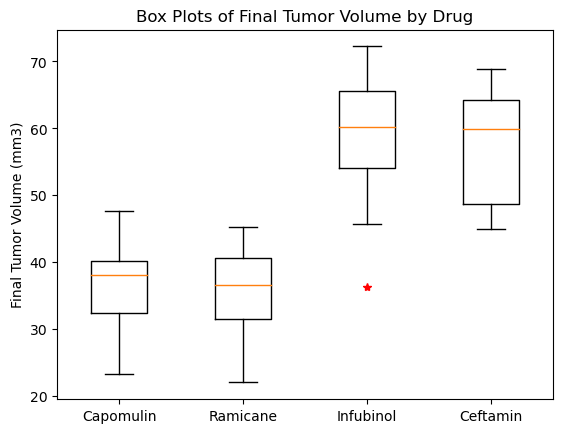

In [28]:
#  Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot (tumor_vol_data, 0, 'r*')
plt.title ("Box Plots of Final Tumor Volume by Drug")
plt.xticks ([1,2,3,4], promising_treatments)
plt.ylabel ("Final Tumor Volume (mm3)")

## Line and Scatter Plots

In [29]:
# Generate a dataframe of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_s185_df = cln_merged_results_df.loc[cln_merged_results_df["Mouse ID"] == "s185",:]
capomulin_mouse_s185_df = capomulin_mouse_s185_df.reset_index(drop=True)
capomulin_mouse_s185_df = capomulin_mouse_s185_df[["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse_s185_df.head(3)

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948


<function matplotlib.pyplot.show(close=None, block=None)>

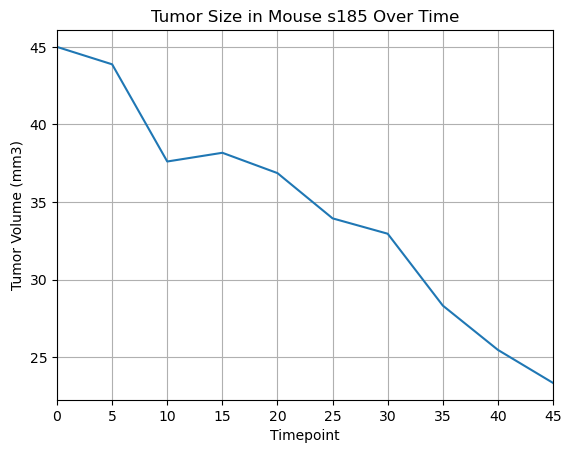

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(capomulin_mouse_s185_df["Timepoint"],capomulin_mouse_s185_df["Tumor Volume (mm3)"])
plt.title ("Tumor Size in Mouse s185 Over Time")
plt.xlabel ("Timepoint")
plt.ylabel ("Tumor Volume (mm3)")
plt.xlim (0,45)
plt.grid ()
plt.show

In [31]:
# Create a summary dataframe for capomulin
capomulin_df = cln_merged_results_df.loc[cln_merged_results_df["Drug Regimen"] == "Capomulin",:]
capomulin_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.0,0


In [32]:
# Find the weight of each mouse
mouseid_weight_df = capomulin_df.loc[capomulin_df["Timepoint"] == 0,:]
mouseid_weight_df = mouseid_weight_df[["Mouse ID","Weight (g)"]]
mouseid_weight_df = mouseid_weight_df.set_index("Mouse ID")
mouseid_weight_df.head(1)

,Weight (g)
Mouse ID,
s185,17


In [33]:
# Find the average tumor volume of each mouse
mouseid_avg_vol_df = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouseid_avg_vol_df = pd.DataFrame(mouseid_avg_vol_df)
mouseid_avg_vol_df = mouseid_avg_vol_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
mouseid_avg_vol_df.head(1)

,Average Tumor Volume (mm3)
Mouse ID,
b128,41.963636


In [34]:
# Combine found information into a single dataframe
capomulin_weight_volume_df = pd.merge(mouseid_weight_df,mouseid_avg_vol_df, on = ["Mouse ID"], how = "inner")
capomulin_weight_volume_df.head()

,Weight (g),Average Tumor Volume (mm3)
Mouse ID,,
s185,17,34.559143
x401,15,36.182040
m601,17,34.847470
f966,17,36.505973
u364,17,39.887495


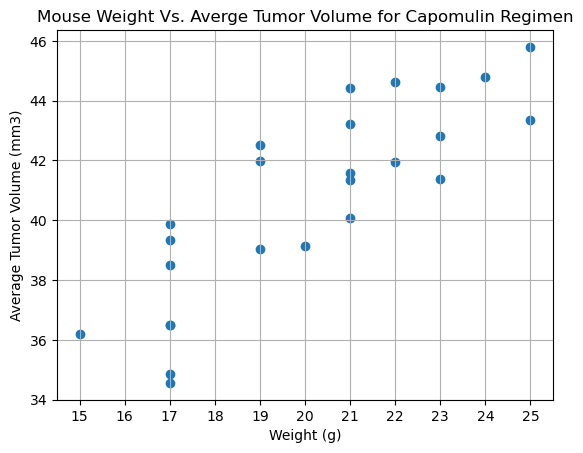

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_weight_volume_df["Weight (g)"],capomulin_weight_volume_df["Average Tumor Volume (mm3)"])
plt.title ("Mouse Weight Vs. Averge Tumor Volume for Capomulin Regimen")
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.xticks (np.arange(15,26, step=1))
plt.yticks (np.arange(34,48, step=2))
plt.grid()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress (capomulin_weight_volume_df["Weight (g)"],capomulin_weight_volume_df["Average Tumor Volume (mm3)"])
linregress (capomulin_weight_volume_df["Weight (g)"],capomulin_weight_volume_df["Average Tumor Volume (mm3)"])


LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694722, pvalue=1.3225722434712285e-07, stderr=0.12754359033201318, intercept_stderr=2.5909876867683446)

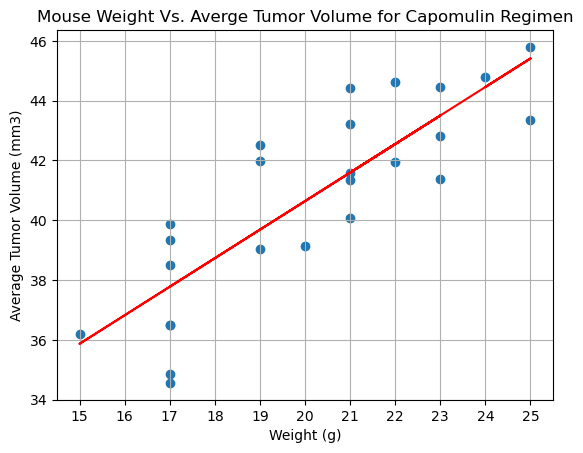

In [37]:
plt.scatter(capomulin_weight_volume_df["Weight (g)"],capomulin_weight_volume_df["Average Tumor Volume (mm3)"])
tumor_values = capomulin_weight_volume_df["Weight (g)"] * slope + intercept
plt.plot(capomulin_weight_volume_df["Weight (g)"],tumor_values,"r-")
plt.title ("Mouse Weight Vs. Averge Tumor Volume for Capomulin Regimen")
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.xticks (np.arange(15,26, step=1))
plt.yticks (np.arange(34,48, step=2))
plt.grid()
plt.show()